<a href="https://colab.research.google.com/github/pallavj112/ES654/blob/main/19110156_ES654_Pallav_Jain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1  

Number of Multiplications: $nmk$
    
Number of Addiditions: $nm(k-1)$

Since multiplying a (n,k) matrix and a (k,m) matrix will result in a (n,m) which will have $nm$ elements. 

Each element will be calculated by multiplying individually k elements in a row from First matrix and k elements in a column from the second matrix. Afterward the k numbers that we got after multiplication will be added this will involve (k-1) additions. Therefore total number of multiplications for calculating an individual element would be k and total number of additions will be k-1

In [1]:
#Q2
import time 
import numpy as np
n = int(input("n"))
k = int(input("k"))
m = int(input("m"))

A = np.random.randint(-100,100,size=(n,k))
B = np.random.randint(-100,100,size=(k,m))
print("A:\n",A,"\n")
print("B:\n",B)
M = np.zeros((n,m))
for i in range(n):
    list = []
    for j in range(m):
        sum = 0
        for l in range(k):
            sum += A[i][l]*B[l][j]
        M[i][j]=int(sum)

print("\nOur Algorithm: ",M,"\n")

M_numpy = np.matmul(A,B)
print("\nMatmul: ",M_numpy,"\n")

print("\n Finding time for the algorithm:")
time1_total = 0
time2_total = 0
no = np.random.randint(0,100)
for i in range(no):
    val = np.random.randint(0,100,size=(3,1))
    n = int(val[0])
    k = int(val[1])
    m = int(val[2])
    A = np.random.randint(-100,100,size=(n,k))
    B = np.random.randint(-100,100,size=(k,m))
    M = np.zeros((n,m))
    start1 = time.time()
    for i in range(n):
        for j in range(m):
            sum = 0
            for l in range(k):
                sum += A[i][l]*B[l][j]
            M[i][j]=int(sum)
    end1 = time.time()
    time1_total += (end1-start1)
    start2 = time.time() 
    M_numpy = np.matmul(A,B)
    end2 = time.time()
    time2_total += (end2-start2)
print("\nOur Algo: ",time1_total/no)
print("\n Matmul:", time2_total/no)

n3
k4
m5
A:
 [[-21  57  86 -95]
 [ 13 -36 -64 -95]
 [ 43 -57  -5 -39]] 

B:
 [[ 39  35  69 -50 -17]
 [ 34  99 -88  74 -51]
 [ 78  35  33 -30  54]
 [ 36  70  43 -30 -73]]

Our Algorithm:  [[  4407.   1268.  -7712.   5538.   9029.]
 [ -9129. -11999.  -2132.   1456.   5094.]
 [ -2055.  -7043.   6141.  -5048.   4753.]] 


Matmul:  [[  4407   1268  -7712   5538   9029]
 [ -9129 -11999  -2132   1456   5094]
 [ -2055  -7043   6141  -5048   4753]] 


 Finding time for the algorithm:

Our Algo:  0.08015275001525879

 Matmul: 0.00011652708053588867


As we can see the numpy function Matmul multiplies much faster than our algorithm. This is obvious since our algorithm as proved above has a time complexity of $O(n^3)$ while their algorithm as stated in an article is of $O(n^{2.37188})$ which is much better than our algorithm.

Q3.
According to the algorithm stated  in the question in order to find the median in the worst case scenario it will make $n + (n-1) + (n-2) +.... n/2$ searches which is equal to $s = n/2(n/2 + n)$. This gives us the time complexity of $O(n^2)$. If we are able to sort the array using an algorith of a lower time complexity  it will improve the running time. We can use merge sort, for sorting the array which has a time complexity of $O(nlog(n))$.

In [2]:
#Q3

import numpy as np

#Algorithm 1: Algorithm suggested by the question
def func(arr):
    l = len(arr)
    temp = arr
    if(l%2==0):
        n1 = temp[0]
        n2 = temp[1]
        for i in range(n//2+1):
            max = int(temp[0])
            for j in temp:
                if (max<=j):
                    max = j
            if(i == n//2-1):
                n2 = max
            print(max)
            temp.remove(max)
           
        n1 = max
        print(n1,n2)
        return (n1+n2)/2
    else:
        for i in range(n+1//2):
            max = int(temp[0])
            for j in temp:
                if (max<=j):
                    max = j
            temp.remove(max)
        return max
#Algorithm 2: Using .sort() which has a time complexity of nlog(n) which is better when compared to n^2 of the 
#previous algorithm

def func2(arr,n):
    arr.sort()
    if(n%2==0):
        n1 = arr[n//2]
        n2 = arr[n//2-1]
        return (n1+n2)/2
    else:
        return arr[(n-1)//2]
    
n = int(input())
arr1 = []
for i in range(n):
    arr1.append(np.random.randint(-100,100))

print("\nArray: ",arr1)

median1 = func(arr1.copy())
print("\nMedian by algorithm1: ",median1)

median2 = func2(arr1.copy(),n)
print("\nMedian by Algorithm2: ",median2)

median3 = np.median(arr1.copy())
print("\nMedian by numpy.median: ",median2)



15

Array:  [-12, 25, 73, 99, 58, -80, -81, 81, 85, 93, -16, 4, 62, -38, 5]

Median by algorithm1:  -81

Median by Algorithm2:  25

Median by numpy.median:  25


Q4

Function: $f(x,y) = x^2y + y^3sin(x)$

Gradient of the function with respect to x is: $2xy + ycos(x)$

Gradient of the function with respect to y is: $x^2 + 3y^2sin(x)$

In [13]:
#Q5 (Working on Google colab)
import numpy as np
import jax.numpy as jnp
from jax import grad

def func(x):
  return x[0]**2*x[1] + x[1]**3*jnp.sin(x[0])
def deri(x):
  return (float(2*x[0]*x[1]+x[1]**3*jnp.cos(x[0])),float(x[0]**2+3*x[1]**2*jnp.sin(x[0])))
no = int(input())

val = np.random.uniform(-100, 100, (no, 2))
jaxgrad = []
mygrad = []

gx = grad(func)
for i in val:
  jaxgrad.append(gx(i))
  mygrad.append(deri(i))

print("\nGradient using JAX:",jaxgrad)
print("\nGradient using our Calculated Gradient:",mygrad)

10

Gradient using JAX: [DeviceArray([ 187.72223, 4242.0767 ], dtype=float32), DeviceArray([754165.4 , -13186.66], dtype=float32), DeviceArray([-28308.91  ,   1996.8433], dtype=float32), DeviceArray([-132502.44  ,   -1128.4989], dtype=float32), DeviceArray([-791508.9   ,   -1793.4797], dtype=float32), DeviceArray([269491.97  ,  -1368.8531], dtype=float32), DeviceArray([-2134.408 ,  6002.6494], dtype=float32), DeviceArray([-268874.5   ,   -2402.8733], dtype=float32), DeviceArray([821569.2   ,   6650.7417], dtype=float32), DeviceArray([-1908.5377,  9526.247 ], dtype=float32)]

Gradient using our Calculated Gradient: [(187.72222900390625, 4242.07666015625), (754165.375, -13186.6611328125), (-28308.91015625, 1996.84375), (-132502.4375, -1128.4989013671875), (-791508.875, -1793.4794921875), (269491.9375, -1368.8529052734375), (-2134.407958984375, 6002.650390625), (-268874.46875, -2402.873291015625), (821569.1875, 6650.7421875), (-1908.5377197265625, 9526.2470703125)]


In [4]:
#Q6
import sympy as smp
import numpy as np
from sympy.vector import CoordSys3D, gradient

R = CoordSys3D('R')
func = R.x**2*R.y+R.y*smp.sin(R.x)
gradient(func)

#As we can see in the output that it matches our answer analytically

(2*R.x*R.y + R.y*cos(R.x))*R.i + (R.x**2 + sin(R.x))*R.j

In [5]:
#Q7
database = {
    2022: {
        "Branch 1":{
            1: {
                "Name": "N",
                "Marks": {
                    "Maths": 100,
                    "English":70
                }
            }
        },
        "Branch 2":{}
    },
    2023:{
        "Branch 1":{},
        "Branch 2":{}
    },
     2024:{
        "Branch 1":{},
        "Branch 2":{}
    },
     2025:{
        "Branch 1":{},
        "Branch 2":{}
    }
}

print(database[2022]["Branch 1"][1]["Marks"]["Maths"])

100


In [6]:
#Q8
class Marks():
    def __init__(self,Maths,English):
        self.Maths = Maths
        self.English = English
class Students():
    def __init__(self,Rollnumber,Name,Marks):
        self.Rollnumber = Rollnumber
        self.Name = Name
        self.Marks = Marks
class Branch():
    def __init__(self,BranchName,Students):
        self.BranchName = BranchName
        self.Students = Students
class Year():
    def __init__(self,YearNo,Branch):
        self.YearNo = YearNo
        self.Branch = Branch

database = [Year(2022,[
                Branch("Branch 1",[Students("1","N",Marks(100,70))]),
                Branch("Branch 2",[])
                      ]),
        Year(2023,[Branch("Branch 1",[]),Branch("Branch 2",[])]),
        Year(2024,[Branch("Branch 1",[]),Branch("Branch 2",[])]),
        Year(2025,[Branch("Branch 1",[]),Branch("Branch 2",[])])]
print(database[0].YearNo,",", database[0].Branch[0].BranchName,",",database[0].Branch[0].Students[0].Name)

2022 , Branch 1 , N


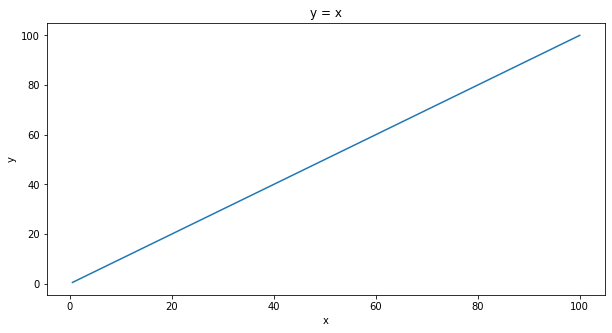

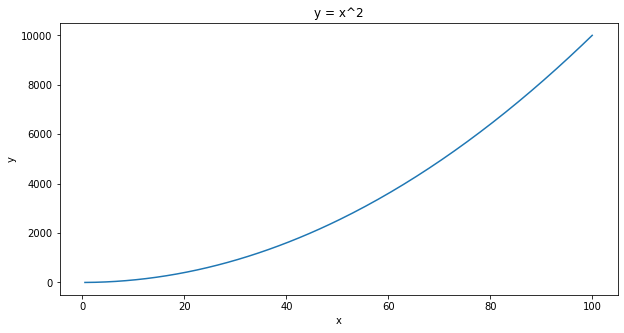

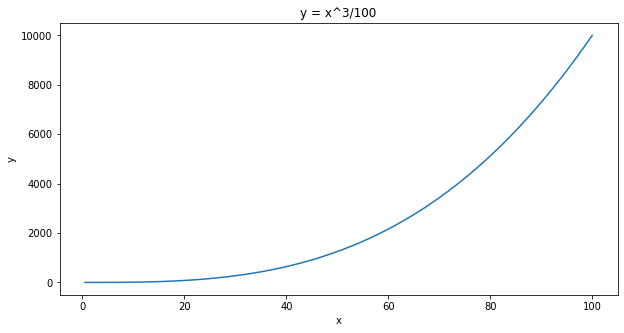

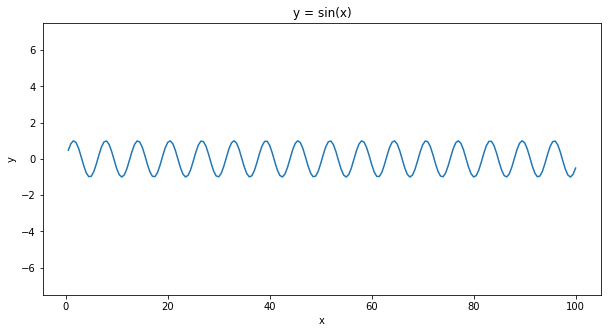

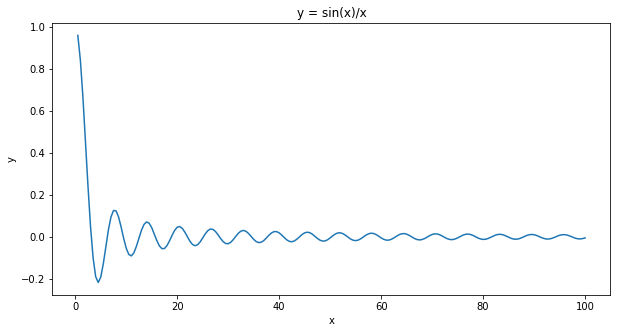

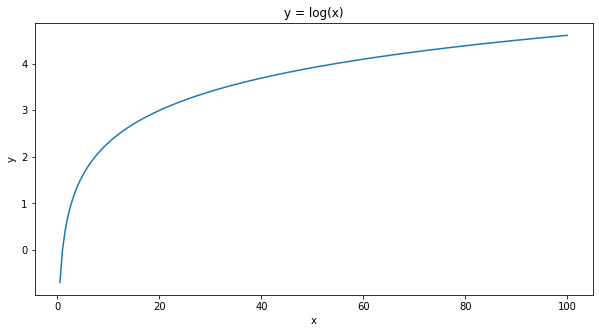

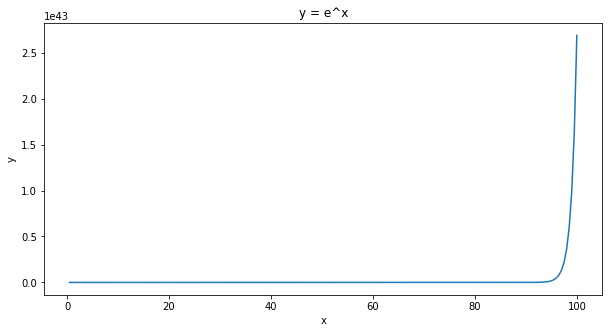

In [7]:
#Q9
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.5,100,num = 200,endpoint = True)
plt.figure(figsize=(10,5))

y1 = x
plt.plot(x, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = x")
plt.show()

plt.figure(figsize=(10,5))
y2 = x ** 2
plt.plot(x, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = x^2")
plt.show()

plt.figure(figsize=(10,5))
y3 = x ** 3/100
plt.plot(x, y3)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = x^3/100")
plt.show()

plt.figure(figsize=(10,5))
y4 = np.sin(x)
plt.plot(x, y4)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-7.5,7.5)
plt.title("y = sin(x)")
plt.show()

plt.figure(figsize=(10,5))
y5 = np.divide(np.sin(x),x)
plt.plot(x, y5)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = sin(x)/x")
plt.show()

plt.figure(figsize=(10,5))
y6 = np.log(x)
plt.plot(x, y6)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = log(x)")
plt.show()

plt.figure(figsize=(10,5))
y7 = np.exp(x)
plt.plot(x, y7)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = e^x")
plt.show()


In [14]:
#Q10
import numpy as np
import pandas as pd
matrix = np.random.uniform(1,2, size=(20, 5))
dataframe = pd.DataFrame(matrix, columns = ['a','b','c','d','e'])

sdev = dataframe.std()
max_sdev = max(sdev)

col = 'a'

for k,v in sdev.items():
    if v == max_sdev:
        col = k

mean = dataframe.mean(axis = 1)
min_mean = min(mean)

row = 0

for k,v in mean.items():
    if v == min_mean:
        row = k
        
print("Matrix:\n",matrix,"\n")
print("Dataframe\n",dataframe,"\n")
print("Highest Standard Dev Column:",col,"\n")
print("Lowest Mean Row:",row)

dataframe['f'] = dataframe.sum(axis=1)
print("\nAdding column f to Dataframe:\n", dataframe)

g = []
for i in dataframe['f']:
    if(i<8):
        g.append("LT8")
    else:
        g.append("GT8")
dataframe['g'] = g
print("\nAdding column g to Dataframe:\n", dataframe)

lt8 =[]
gt8 =[]
for i in range(len(dataframe.index)):
    if(dataframe['g'][i]=="LT8"):
        lt8.append(dataframe['f'][i])
    else:
        gt8.append(dataframe['f'][i])
        
sdev_lt8 = np.std(lt8)
sdev_gt8 = np.std(gt8)
print("\nStandard Deviation for LT8 rows is: ",sdev_lt8)
print("\nStandard Deviation for GT8 rows is: ",sdev_gt8)

Matrix:
 [[1.34876668 1.4475095  1.33370724 1.1467159  1.83441199]
 [1.60390316 1.80618818 1.87220083 1.02090881 1.2875924 ]
 [1.6786366  1.56098172 1.49181621 1.87587226 1.45041518]
 [1.45410579 1.75543521 1.60427135 1.68996677 1.95819203]
 [1.3862203  1.14547315 1.63034313 1.76277365 1.30502423]
 [1.85790644 1.87491817 1.65560153 1.49913723 1.14342326]
 [1.10540344 1.35589365 1.41381879 1.72387503 1.4062691 ]
 [1.9072852  1.36278845 1.2723907  1.80500214 1.64616169]
 [1.47761122 1.90261598 1.16430606 1.38386901 1.83681823]
 [1.27779189 1.90706592 1.82883862 1.27066113 1.99830007]
 [1.38101791 1.75629448 1.19541276 1.95102194 1.87030059]
 [1.53375393 1.46426879 1.52281873 1.94246068 1.73584566]
 [1.01155737 1.32419589 1.3040349  1.57389921 1.2442159 ]
 [1.95471909 1.27030768 1.63649462 1.68511517 1.53503855]
 [1.79968555 1.32031165 1.80623344 1.88119315 1.11864012]
 [1.19553083 1.36157485 1.65453627 1.4914102  1.30143818]
 [1.20359668 1.67765127 1.8584804  1.8681503  1.23331367]
 [1.8

In [9]:
#Q12
import numpy as np

a = np.arange(4).reshape((4,1))
b = np.arange(4)

print(a+b)

#The above peice of code shows broadcasting. 
#Bot the arrays are of differend shape so the library expands and pads the the shape in order to make the of same shape.
#In our case both the arrays are reshaped into a 3x3 array and then the operation of addition is performed

[[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]


In [10]:
#Q13
import numpy as np

def func(arr):
    flat_arr =[]
    for i in arr:
        if len(i>1):
            for j in i:
                flat_arr.append(j)
        else:
            flat_arr.append(i)
    mini = flat_arr[0]
    min_ind = 0
    for i in range(len(flat_arr)):
        if(flat_arr[i]<mini):
            mini = flat_arr[i]
            min_ind = i
    return min_ind

arr = np.random.randint(0,100,size =(5,4)) 
print("Array: \n",arr)
print("\nMy function: ",func(arr))
print("\nNumpy.argmin(): ",np.argmin(arr))

    


Array: 
 [[72 50 92 83]
 [32 70 48 24]
 [51  2 33 39]
 [ 2 87 86 92]
 [39 99  7 38]]

My function:  9

Numpy.argmin():  9
